<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 76.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 92.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 45.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-linux_x86_64.whl size=300802 sha256=1108f853aa3fd57a5438

In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [108]:
def make_graph(stock_data, revenue_data, stock, stock_date, revenue_date):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= stock_date]
    revenue_data_specific = revenue_data[revenue_data.Date <= revenue_date]
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [29]:
tesla = yf.Ticker("TSLA")

In [30]:
tesla_data = tesla.history(period="max")

In [31]:
tesla_data.reset_index(inplace=True)

## Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [32]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [33]:
html_data = requests.get(url).text

In [34]:
soup = BeautifulSoup(html_data, 'html.parser')

In [50]:
tesla_revenue = pd.read_html(url)[0]

In [52]:
tesla_revenue

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [51]:
tesla_revenue.columns.tolist()

['Tesla Annual Revenue (Millions of US $)',
 'Tesla Annual Revenue (Millions of US $).1']

In [61]:
tesla_revenue = tesla_revenue.rename(columns={'Tesla Annual Revenue (Millions of US $)': "Date", 'Tesla Annual Revenue (Millions of US $).1': "Revenue"})

In [62]:
tesla_revenue

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [88]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [89]:
tesla_revenue["Revenue"]

0     53823
1     31536
2     24578
3     21461
4     11759
5      7000
6      4046
7      3198
8      2013
9       413
10      204
11      117
12      112
Name: Revenue, dtype: object

In [90]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [91]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Use yfinance to Extract Stock Data


In [8]:
gme = yf.Ticker("GME")

In [9]:
gme_data = gme.history(period="max")

In [11]:
gme_data.reset_index(inplace=True)

## Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [12]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [15]:
html_data_2 = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data_2,"html.parser")

In [26]:
gme_revenue = pd.read_html(url)[1]

In [27]:
gme_revenue.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [101]:
gme_revenue.columns.tolist()

['GameStop Quarterly Revenue (Millions of US $)',
 'GameStop Quarterly Revenue (Millions of US $).1']

In [102]:
gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)': "Date", 'GameStop Quarterly Revenue (Millions of US $).1': "Revenue"})

In [103]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [105]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [106]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

## Plot Tesla Stock Graph


In [95]:
stock_data_specific = tesla_data[tesla_data.Date <= '2021-06-14']
revenue_data_specific = tesla_revenue[tesla_revenue.Date <= 2021]

In [96]:
stock_data_specific.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [92]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)

/tmp/ipykernel_83/4161096227.py:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



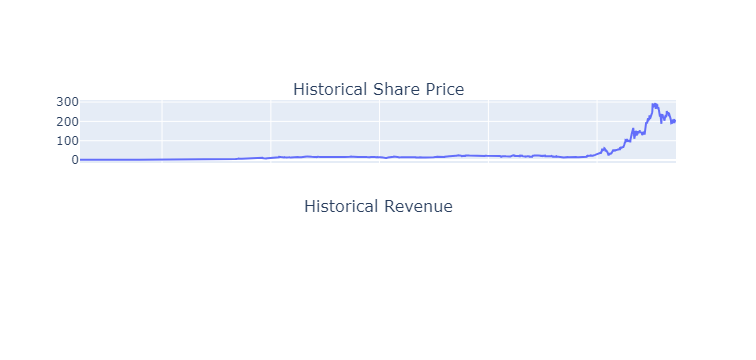

In [93]:
fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)

In [97]:
revenue_data_specific.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


/tmp/ipykernel_83/2938549132.py:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



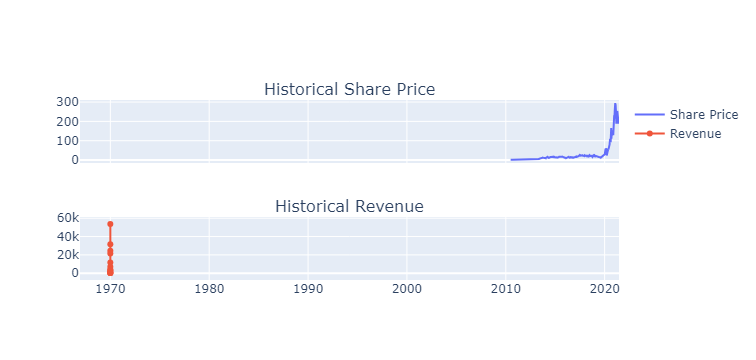

In [98]:
fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)

/tmp/ipykernel_83/1820514157.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_83/1820514157.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



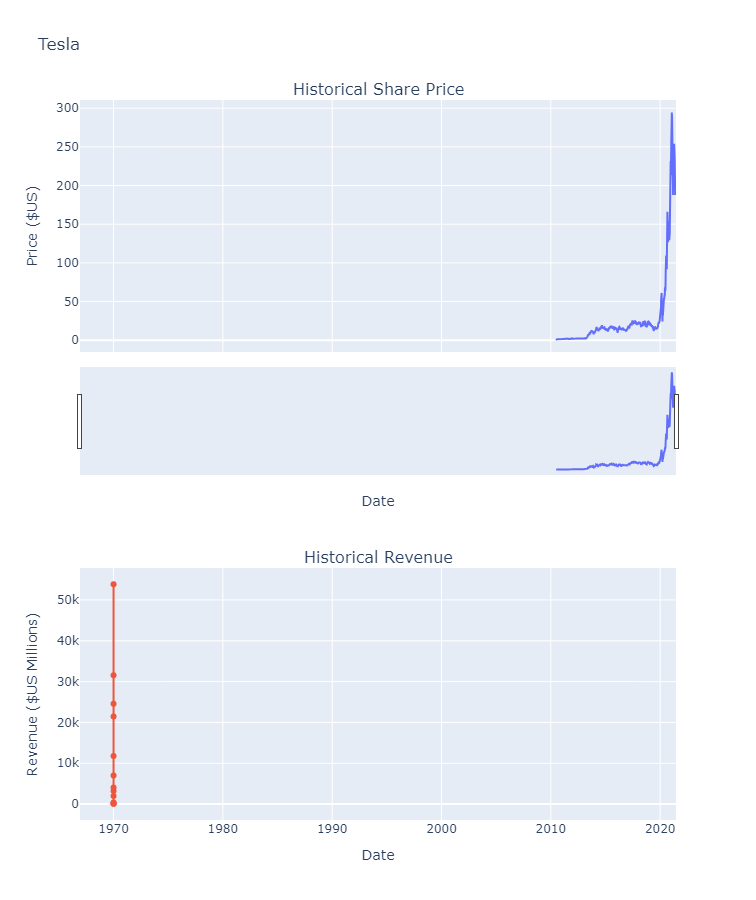

In [109]:
make_graph(tesla_data, tesla_revenue, 'Tesla', stock_date='2021-06-14', revenue_date=2021)

## Plot GameStop Stock Graph


/tmp/ipykernel_83/1820514157.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_83/1820514157.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



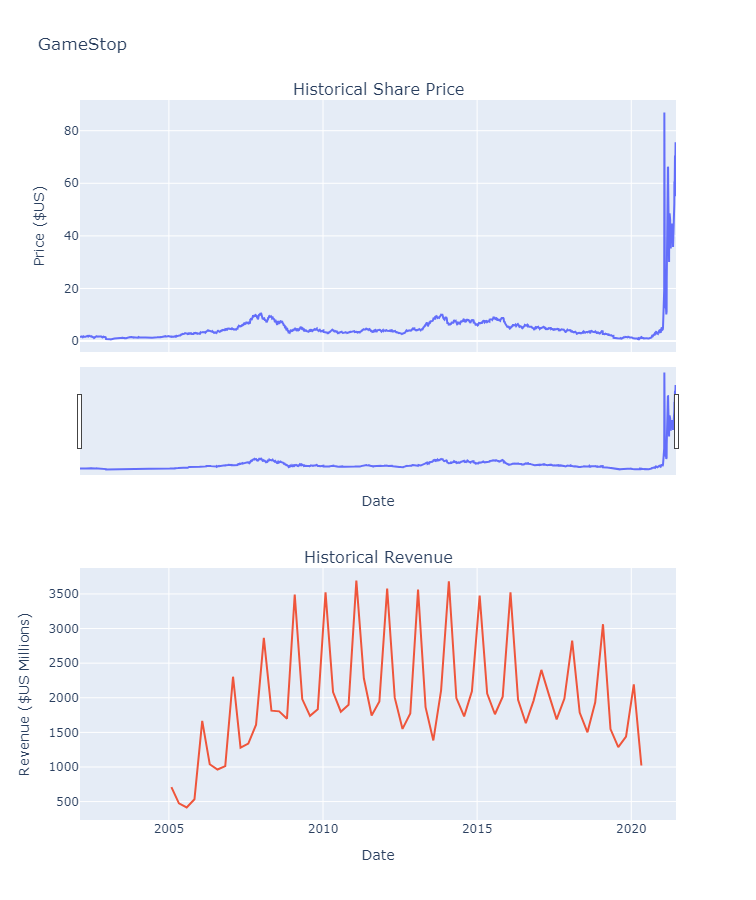

In [110]:
make_graph(gme_data, gme_revenue, 'GameStop', stock_date='2021-06-14', revenue_date='2021-06-14')